<a href="https://colab.research.google.com/github/amdhanwate/Twitter-Sentiment-Analysis/blob/main/twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program is used to analyze sentiments of the tweets of the user.

In [7]:
# Import modules

import tweepy
from tweepy.auth import OAuthHandler
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving secret.py to secret.py


In [5]:
# Get the Twitter API Credentials

from secret import API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

In [9]:
# Creating Authentication Object
authenticate = OAuthHandler(API_KEY, API_SECRET)

# Set the access token and access token secret
authenticate.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Create the API Object while passing the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [35]:
# Extract 100 tweets from a twitter user
posts = api.user_timeline(screen_name="BillGates", count=10000, lang="en", tweet_mode="extended")

# Print the last five tweets from this account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ") " + tweet.full_text + "\n")
  i += 1

Show the 5 recent tweets: 

1) Getting an early start on my weekend reading: this article does a good job explaining immunity and what may happen with COVID-19 in the future. https://t.co/AHatTlUdOr

2) During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job. https://t.co/oAzGsIGSUN #endpolio

3) RT @UN: Let us renew our determination to build a strong, sustainable and inclusive recovery from the pandemic, and to take decisive action…

4) Our foundation joined the polio fight almost 15 years ago. And in all that time, I cannot think of a more important moment than right now. https://t.co/ZUyvSZyzau

5) I look forward to working with you and @EU_Commission on all of these important goals. Europe is a critical partner in creating a net-zero future and ensuring a healthy and equitable world for all. https://t.co/O16waKVVVo

In [38]:
# Create a dataframe with a column called 'Tweets'
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,Getting an early start on my weekend reading: ...
1,"During the height of the U.S. polio epidemic, ..."
2,RT @UN: Let us renew our determination to buil...
3,Our foundation joined the polio fight almost 1...
4,I look forward to working with you and @EU_Com...


In [39]:
# Clean the Tweets

# Create a function to clean the tweets
def cleanTweets(tweet):
  tweet = re.sub('@[A-Za-z0-9]+', '', tweet)
  tweet = re.sub('#', '', tweet)
  tweet = re.sub('RT[\s]+', '', tweet)
  tweet = re.sub('https?:\/\/\S+', '', tweet)
  tweet = re.sub(':', '', tweet)

  return tweet

# Cleaning the tweets
df['Tweets'] = df['Tweets'].apply(cleanTweets)

# Show cleaned tweets
df

,Tweets
0,Getting an early start on my weekend reading t...
1,"During the height of the U.S. polio epidemic, ..."
2,Let us renew our determination to build a str...
3,Our foundation joined the polio fight almost 1...
4,I look forward to working with you and _Commis...
...,...
195,These heroes represent the best of who we can ...
196,Some countries responded successfully to the ...
197,Clinical trials are critical to helping resear...
198,I tackle every big new problem by asking two q...


In [40]:
# Create a function to get 'Subjectivity'
def getSubjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

# Create a function to get 'Polarity'
def getPolarity(tweet):
  return TextBlob(tweet).sentiment.polarity

# Create columns for 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,Getting an early start on my weekend reading t...,0.341667,0.266667
1,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000
2,Let us renew our determination to build a str...,0.733333,0.433333
3,Our foundation joined the polio fight almost 1...,0.678571,0.395238
4,I look forward to working with you and _Commis...,0.606250,0.225000
...,...,...,...
195,These heroes represent the best of who we can ...,0.615152,0.509091
196,Some countries responded successfully to the ...,0.642500,0.512500
197,Clinical trials are critical to helping resear...,0.650000,0.250000
198,I tackle every big new problem by asking two q...,0.184848,0.045455


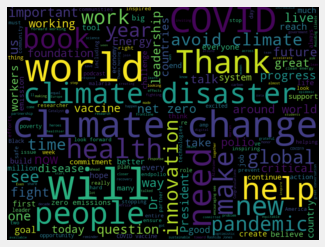

In [41]:
# Plot Word CLoud
allWords = ' '.join(tweets for tweets in df['Tweets'])
wordCloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show thw dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Getting an early start on my weekend reading t...,0.341667,0.266667,Positive
1,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000,Positive
2,Let us renew our determination to build a str...,0.733333,0.433333,Positive
3,Our foundation joined the polio fight almost 1...,0.678571,0.395238,Positive
4,I look forward to working with you and _Commis...,0.606250,0.225000,Positive
...,...,...,...,...
195,These heroes represent the best of who we can ...,0.615152,0.509091,Positive
196,Some countries responded successfully to the ...,0.642500,0.512500,Positive
197,Clinical trials are critical to helping resear...,0.650000,0.250000,Positive
198,I tackle every big new problem by asking two q...,0.184848,0.045455,Positive


In [43]:
# Print all the Positive Tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ") " + sortedDF['Tweets'][i] + "\n")
    j += 1

1) Getting an early start on my weekend reading this article does a good job explaining immunity and what may happen with COVID-19 in the future. 

2) During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job.  endpolio

3)  Let us renew our determination to build a strong, sustainable and inclusive recovery from the pandemic, and to take decisive action…

4) Our foundation joined the polio fight almost 15 years ago. And in all that time, I cannot think of a more important moment than right now. 

5) I look forward to working with you and _Commission on all of these important goals. Europe is a critical partner in creating a net-zero future and ensuring a healthy and equitable world for all. 

6) Reaching net-zero emissions by 2050 means transforming our entire physical economy and accelerating innovation at an unpreceden

In [28]:
# Print all the Negative Tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ") " + sortedDF['Tweets'][i] + "\n")
    j += 1

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects  

4)  Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6)  Black folks have questions about the COVID-19 v

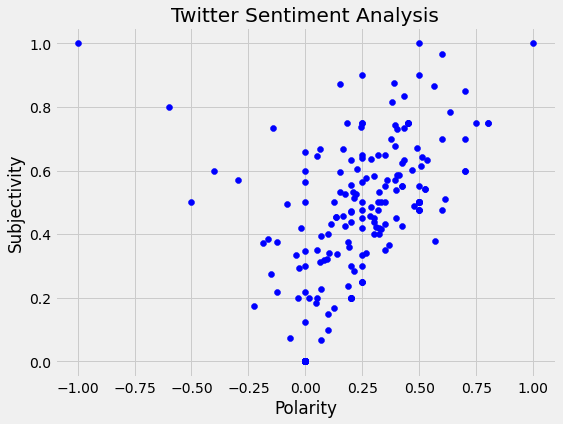

In [44]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue')

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [45]:
# Get the percentage of positive tweets
pTweets = df[df.Analysis == 'Positive']
pTweets = pTweets['Tweets']

round(pTweets.shape[0] / df.shape[0] *100, 2)

74.5

In [46]:
# Get the percentage of negative tweets
nTweets = df[df.Analysis == 'Negative']
nTweets = nTweets['Tweets']

round(nTweets.shape[0] / df.shape[0] *100, 2)

9.5

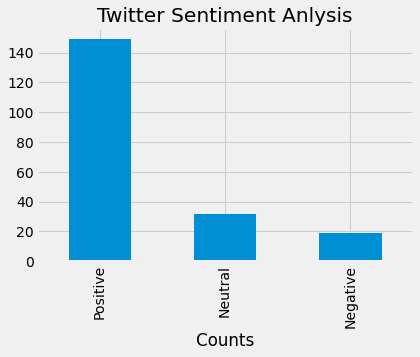

In [47]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and Visulise the counts
plt.title('Twitter Sentiment Anlysis')
plt.xlabel('Sentiment')
plt.xlabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()